Multiple_Linear_Regression (using Gradient Descent)

In [1]:
##importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
data.shape

(506, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
#seperating data
X = data.drop('medv',axis =1)
y = data['medv']

In [6]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [7]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [8]:
# Scaling features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [9]:
##Cost Function

def cost_function(X, Y, B):
 m = len(Y)
 J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
 return J

In [10]:
##Gradient Descent

def gradient_descent(X, Y, B, alpha, iterations):
 cost_history = [0] * iterations
 m = len(Y)
 
 for iteration in range(iterations):
    h = X.dot(B)
    loss = h - Y
    gradient = X.T.dot(loss) / m
    B = B - alpha * gradient
    cost = cost_function(X, Y, B)
    cost_history[iteration] = cost
 
 return B, cost_history

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train, y_test = train_test_split(X,y,test_size = 0.42,random_state = 42)

X_train = np.c_[np.ones(len(X_train),dtype='int64'),X_train]
X_test = np.c_[np.ones(len(X_test),dtype='int64'),X_test]

In [12]:
# Initial Coefficients
B = np.zeros(X_train.shape[1])
alpha = 0.005
iter_ = 10000
newB, cost_history = batch_gradient_descent(X_train, y_train, B, alpha, iter_)

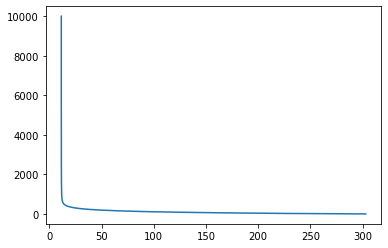

In [13]:
plt.plot(cost_history,range(iter_))
plt.show()

In [14]:
y_ = X_test.dot(newB)

In [15]:
def r2(y_,y):
 sst = np.sum((y-y.mean())**2)
 ssr = np.sum((y_-y)**2)
 r2 = 1-(ssr/sst)
 return(r2)
#----------------
r2(y_,y_test)

0.7258033295322617